In [21]:
package interface_check{
    
    part a{
        in port x:X; 
    }
    part b{
        out port y:Y;
    }    
    
    
    interface def int {
        end i_n;
        end o_u;
        flow of c from o_u.c to i_n.c;
    }
    
    interface int01 : int connect a.x to b.y;
    
    part def A;
    part def B;
    
    item c{
        item c1;
        item c2;
    }
    
    port def X{
        out item c2;
    }
    port def Y{
        out item c2;
    }
    
}

Package interface_check (18d3b1e4-c088-41ce-b861-d25e1dc7db91)


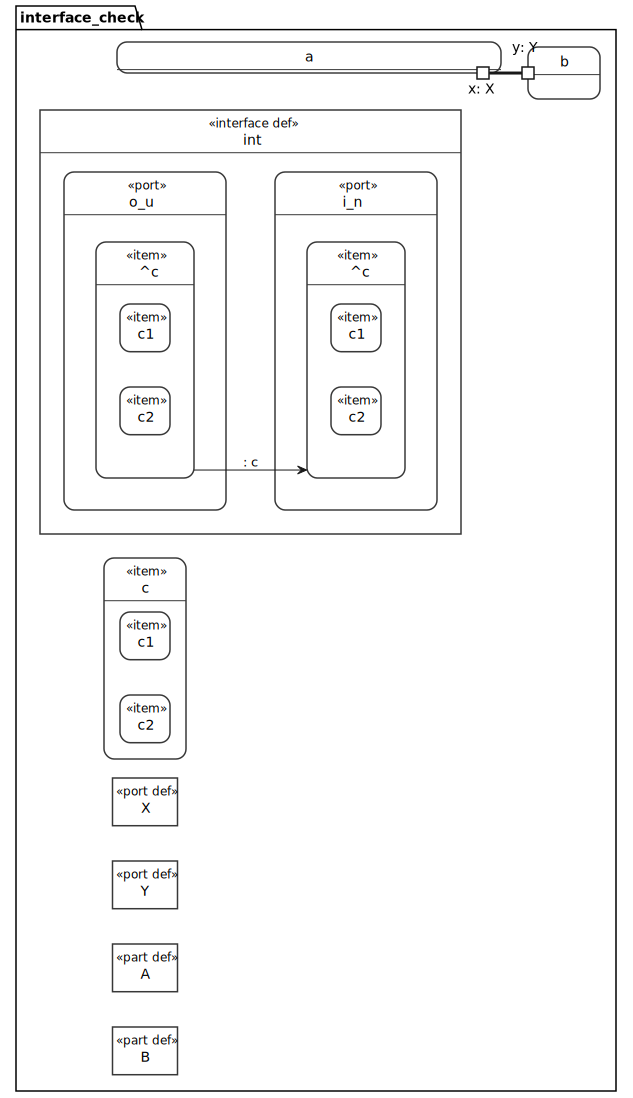

In [22]:
%viz --view=INTERCONNECTION --style=LR interface_check

In [25]:
package interface_check1{
    
    part a{
        in port x:X; 
    }
    part b{
        out port y:Y;
    }    
    
    
    interface def int {
        end i_n:X; // the difference is that the ends of interface typed with the port type
        end o_u:Y;
        flow of c from o_u.c to i_n.c;
    }
    
    interface int01 : int connect a.x to b.y;
    
    part def A;
    part def B;
    
    item c{
        item c1;
        item c2;
    }
    
    port def X{
        out item c2;
    }
    port def Y{
        out item c2;
    }
    
}

Package interface_check1 (49b63821-7d4d-4be3-87a6-48056fe99391)


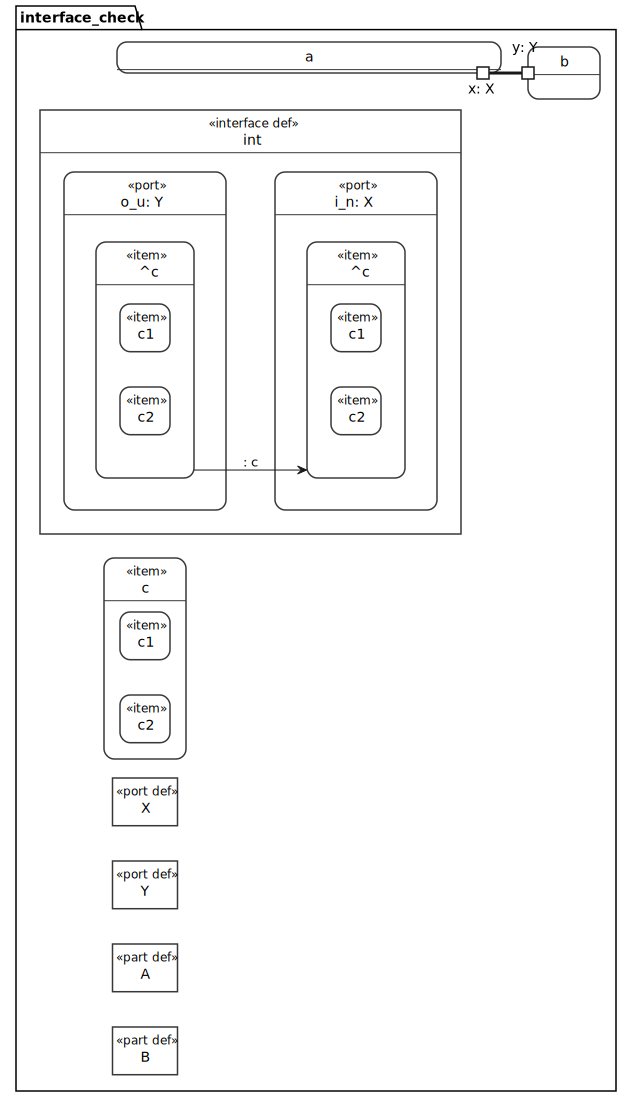

In [26]:
%viz --view=INTERCONNECTION --style=LR interface_check

after typping the interface with the ports it is still working but the item is a general type of item not the specefic one. 

In [30]:
package interface_check2{
    
    part a{
        in port x:X; 
    }
    part b{
        out port y:Y;
    }    
    
    
    interface def int {
        end i_n:X; // the difference is that the ends of interface typed with the port type
        end o_u:Y;
        flow of c from i_n.c1 to o_u.c1; //wrong item 
    }
    
    interface int01 : int connect a.x to b.y;
    
    part def A;
    part def B;
    
    item c{
        item c1;
        item c2;
    }
    
    port def X{
        out item c2;
    }
    port def Y{
        out item c2;
    }
    
}

ERROR:Couldn't resolve reference to Feature 'c1'. (30.sysml line : 14 column : 28)
ERROR:Couldn't resolve reference to Feature 'c1'. (30.sysml line : 14 column : 38)


if the type of the item (flow) defined to be transfered between to end of interface is not compatible with the type defined in the port definition and allocated through the port utilization, it will give error. 

In [31]:
package interface_check3{
    
    part a{
        in port x:X; 
    }
    part b{
        out port y:Y;
    }    
    
    
    interface def int {
        end i_n:X; // the difference is that the ends of interface typed with the port type
        end o_u:Y;
        flow of c from i_n.c2 to o_u.c2; //correct item 
    }
    
    interface int01 : int connect a.x to b.y;
    
    part def A;
    part def B;
    
    item c{
        item c1;
        item c2;
    }
    
    port def X{
        out item c2;
    }
    port def Y{
        out item c2;
    }
    
}

Package interface_check3 (98626706-deae-43b2-a2d8-6afcc4d6277b)


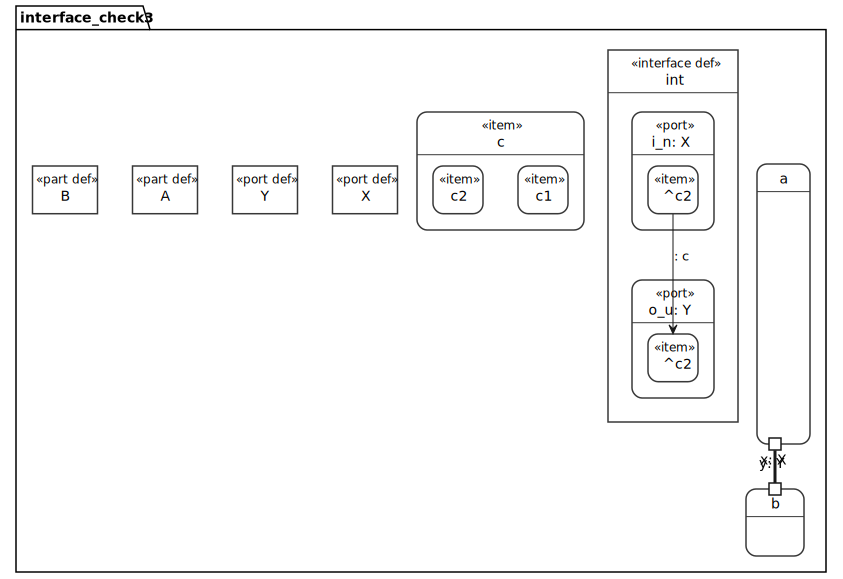

In [32]:
%viz interface_check3

In [71]:
package interface_check4{
    
    part a{
         port x:X; // the in has removed. seems no difference atleas in the graphical notatin.
    }
    part b{
        out port y:~Y; //use the ~ to return the direction of the port and define all the items of the port in the out mode. 
    }    
    
    
    interface def int {
        end i_n:X; // the difference is that the ends of interface typed with the port type
        end o_u:Y;
        flow of c2:c from i_n.c2 to o_u.c2; // the first object, means the flow of c, the c should be the main item type or
                                            //shoululd be typed by the main item. then the item type cannot be the root type!  
    }
    
    interface int01 : int connect a.x to b.y;
    
    part def A;
    part def B;
    
    item c{
        item c1;
        item c2;
    }
    
    port def X{
        out item c2;
    }
    port def Y{
        out item c2; // it has a bug that those not consider that the out port is allocated to in port. 
                    // the solution seems to be define every thing as out item and ues ~ when need an input flow. 
    }
    
}

Package interface_check4 (ca0ce599-43bb-4a3c-acb6-cb03702747e9)


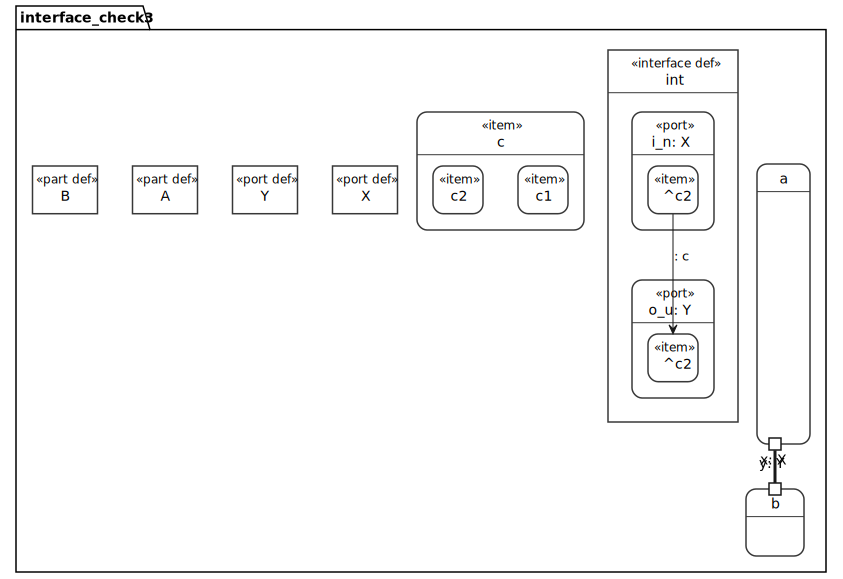

In [72]:
%viz --view=INTERCONNECTION interface_check3

In [1]:
package interface_check5{
    
    part a{
        in port x:X; 
    }
    part b{
        out port y:~Y; //use the ~ to return the direction of the port and define all the items of the port in the out mode. 
    }    
    
    
    interface def int {
        end i_n:X; // the difference is that the ends of interface typed with the port type
        end o_u:Y;
        flow of c2:c from i_n.c2 to o_u.c2;
        end i_n2:X;
        end o_u2:Y;
        flow of c1:c from i_n2.c1 to o_u2.c1;
    }
    
    
    interface int01 : int connect a.x to b.y;
    
    part def A;
    part def B;
    
    item c{
        item c1;
        item c2;
    }
    
    port def X{
        out item c1;
        out item c2;
    }
    port def Y{
        out item c2; // it has a bug that those not consider that the out port is allocated to in port. 
                    // the solution seems to be define every thing as out item and ues ~ when need an input flow. 
        out item c1;
    }
    
    
}

ERROR:Cannot have more than two ends (1.sysml line : 21 column : 5)


In [2]:
per each item of the port a separate interface shold be defined otherwise it will not work and would not connect the parts to gether. 

ERROR:no viable alternative at input 'each' (2.sysml line : 1 column : 5)
ERROR:no viable alternative at input 'item' (2.sysml line : 1 column : 10)
ERROR:no viable alternative at input 'port' (2.sysml line : 1 column : 22)
ERROR:no viable alternative at input 'separate' (2.sysml line : 1 column : 29)
ERROR:no viable alternative at input 'interface' (2.sysml line : 1 column : 38)
ERROR:no viable alternative at input 'be' (2.sysml line : 1 column : 48)
ERROR:no viable alternative at input 'otherwise' (2.sysml line : 1 column : 57)
ERROR:no viable alternative at input 'it' (2.sysml line : 1 column : 75)
ERROR:no viable alternative at input 'will' (2.sysml line : 1 column : 78)
ERROR:no viable alternative at input 'not' (2.sysml line : 1 column : 83)
ERROR:no viable alternative at input 'and' (2.sysml line : 1 column : 92)
ERROR:no viable alternative at input 'not' (2.sysml line : 1 column : 102)
ERROR:no viable alternative at input 'parts' (2.sysml line : 1 column : 118)
ERROR:no viable 

In [1]:
package interface_check6{
    
    part a{
        port a_x:X; // the in has removed. seems no difference atleas in the graphical notatin.
        port a_y:Y; // an additional port has been added.
    }
    part b{
        port b_x:X;
        port b_y:Y; //use the ~ to return the direction of the port and define all the items of the port in the out mode. 
    }    
    
    
    interface def int_x {
        end i_n:X; // the difference is that the ends of interface typed with the port type
        end o_u:X;
        flow of c2:c from i_n.c2 to o_u.c2; // the first object, means the flow of c, the c should be the main item type or
                                            //shoululd be typed by the main item. then the item type cannot be the root type!  
    }
    
    interface def int_y {
        end i_n:Y; // the difference is that the ends of interface typed with the port type
        end o_u:Y;
        flow of c1:c from i_n.c1 to o_u.c1; // the first object, means the flow of c, the c should be the main item type or
                                            //shoululd be typed by the main item. then the item type cannot be the root type!  
    }
    
    interface int01 : int_x connect a.a_x to b.b_x; //ok
    interface int02 : int_x connect a.a_y to b.b_y; //not ok 
    interface int03 : int_y connect a.a_x to b.b_y; //ok 
    interface int04 : int_x connect a.a_y to b.b_x; //not ok
    
    part def A;
    part def B;
    
    item c{
        item c1;
        item c2;
    }
    
    port def X{
        out item c2;
    }
    port def Y{
        out item c1; // it has a bug that those not consider that the out port is allocated to in port. 
                    // the solution seems to be define every thing as out item and ues ~ when need an input flow. 
    }
    
}

Package interface_check6 (9b8c7f04-f775-4cc1-b812-aa1870943b21)


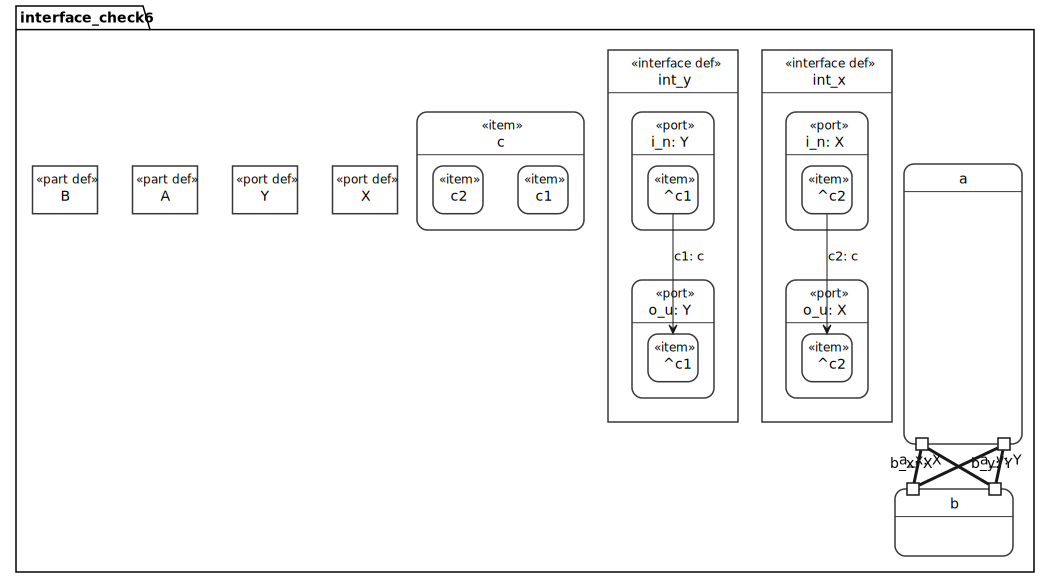

In [2]:
%viz --view=INTERCONNECTION interface_check6